In [38]:
import numpy as np
import pandas as pd

In [54]:

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [55]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [56]:
df.dropna(inplace=True)

In [57]:
df.shape

(714, 3)

In [58]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [59]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [62]:
clf = DecisionTreeClassifier()

In [64]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [66]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy'))

0.6331181533646322

In [80]:
kbin_age = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal', strategy = 'quantile')

In [81]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [82]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [83]:
trf.named_transformers_['first'].n_bins_

array([15])

In [84]:
trf.named_transformers_['second'].n_bins_

array([15])

In [85]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [86]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [87]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [88]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                             bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'],
                              bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [89]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
745,70.0,14.0,71.0000,12.0,"(54.0, 80.0]","(51.479, 76.292]"
553,22.0,4.0,7.2250,0.0,"(21.0, 23.0]","(0.0, 7.25]"
787,8.0,1.0,29.1250,10.0,"(6.0, 16.0]","(26.55, 31.275]"
723,50.0,13.0,13.0000,6.0,"(47.0, 54.0]","(10.5, 13.0]"
685,25.0,6.0,41.5792,11.0,"(23.0, 25.0]","(31.275, 51.479]"


In [90]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [91]:
accuracy_score(y_test, y_pred2)

0.6363636363636364

In [92]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy'))

0.6317292644757433

In [102]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age,[0]),
        ('second', kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color = 'red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:, 0], color = 'red')
    plt.title('After')
    
    plt.show()

0.6345266040688575


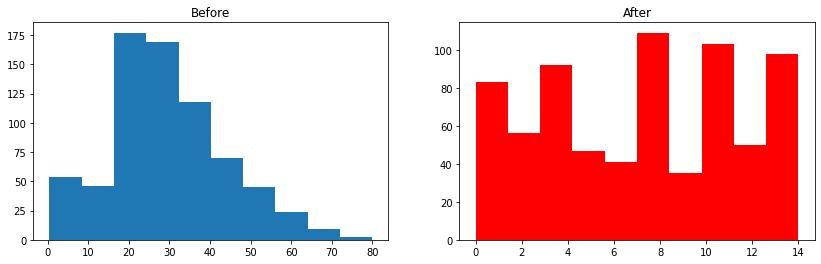

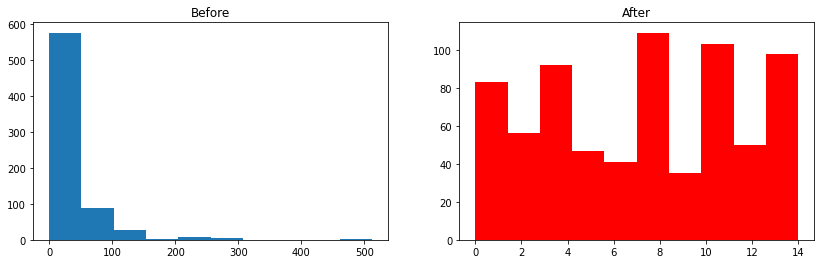

In [103]:
discretize(10, 'quantile')

0.6316705790297339


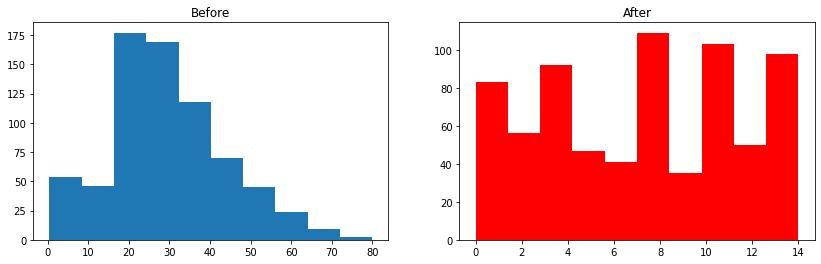

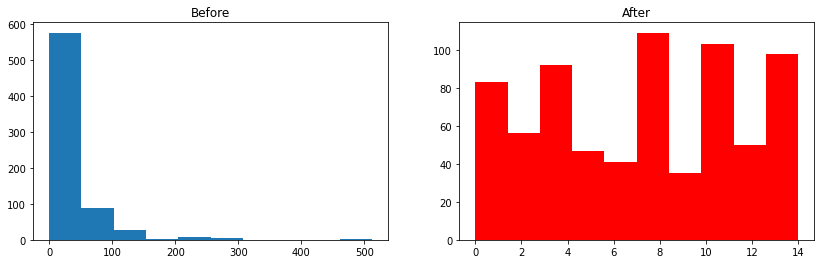

In [104]:
discretize(10, 'uniform')

0.6288928012519561


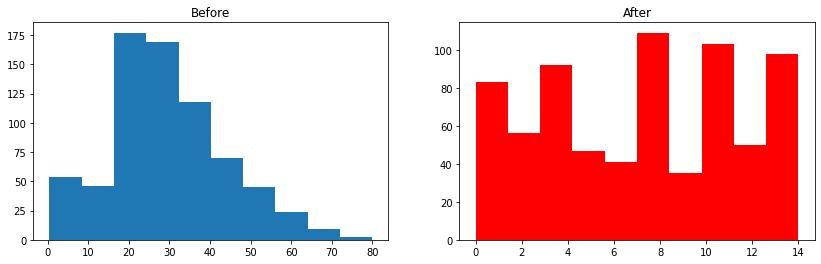

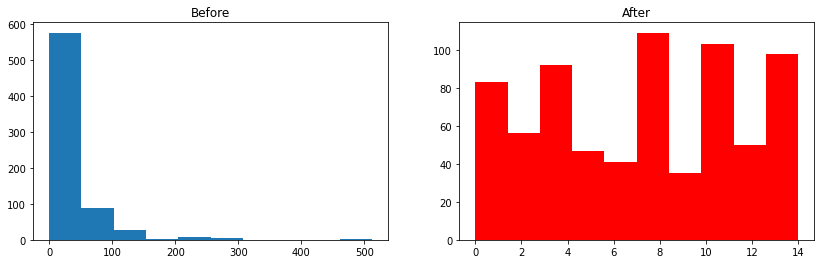

In [105]:
discretize(5, 'kmeans')